In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(8425, 23)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


Data Cleaning

The data which is obtained from the primary sources is termed the raw data and required a lot of preprocessing before we can derive any conclusions from it or do some modeling on it. Those preprocessing steps are known as data cleaning and it includes, outliers removal, null value imputation, and removing discrepancies of any sort in the data inputs.




In [ ]:
df.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [ ]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Here we can observe that there are unnecessary spaces in the names of the columns let’s remove that.



In [ ]:
df.rename(str.strip,
          axis='columns',
          inplace=True)

df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Now it’s time for null value imputation.



In [ ]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:

    df[col] = df[col].fillna(val)

df.isnull().sum().sum()


0

Exploratory Data Analysis

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. Here we will see how to check the data imbalance and skewness of the data.



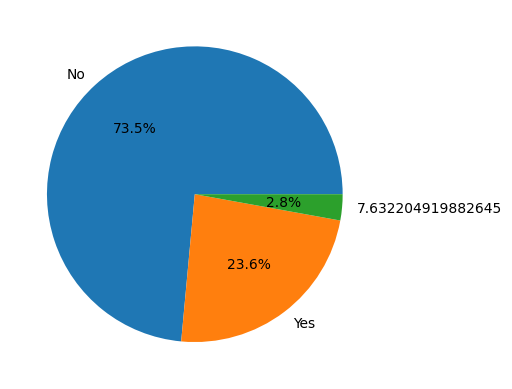

In [12]:
plt.pie(df['RainToday'].value_counts().values,
        labels = df['RainToday'].value_counts().index,
        autopct='%1.1f%%')
plt.show()


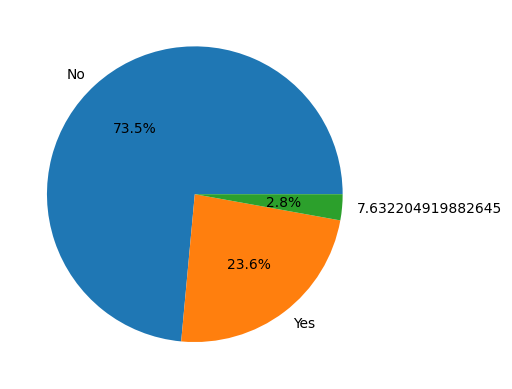

In [13]:
plt.pie(df['RainTomorrow'].value_counts().values,
        labels = df['RainTomorrow'].value_counts().index,
        autopct='%1.1f%%')
plt.show()


In [14]:
df.groupby('RainTomorrow').mean()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainTomorrow,,,,,,,,,,,,,,,,
7.632204919882645,14.706693,24.461504,2.922956,4.941480,6.594859,39.067045,15.543309,19.553457,66.788632,50.234359,943.715261,933.150259,7.184881,6.616709,17.707879,21.665740
No,12.846077,24.376826,1.490999,5.537997,8.207177,34.680266,13.326481,18.035613,64.826000,45.991944,858.865940,856.728700,5.062361,4.999617,17.773899,22.947371
Yes,14.092041,22.179588,6.883223,4.980791,5.967702,41.205046,15.028450,19.375062,75.486563,65.496926,856.502266,854.309616,6.437496,6.563055,17.446617,20.252544


In [15]:
df.groupby('RainToday').mean()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,,,
7.632204919882645,14.493053,24.135415,2.805913,4.768252,6.852381,41.434054,15.485156,21.614082,64.659485,48.967147,943.676448,941.981031,7.446329,6.921950,17.075318,21.588814
No,12.941637,24.643548,0.060145,5.610710,8.044681,35.516858,13.516141,18.177400,63.816077,46.961376,859.152429,856.524110,5.076711,5.123558,18.023794,23.093177
Yes,13.820013,21.387447,11.353668,4.775340,6.442189,38.316285,14.444782,18.685063,78.891671,62.639520,855.571261,853.841880,6.360918,6.140378,16.744837,19.807210


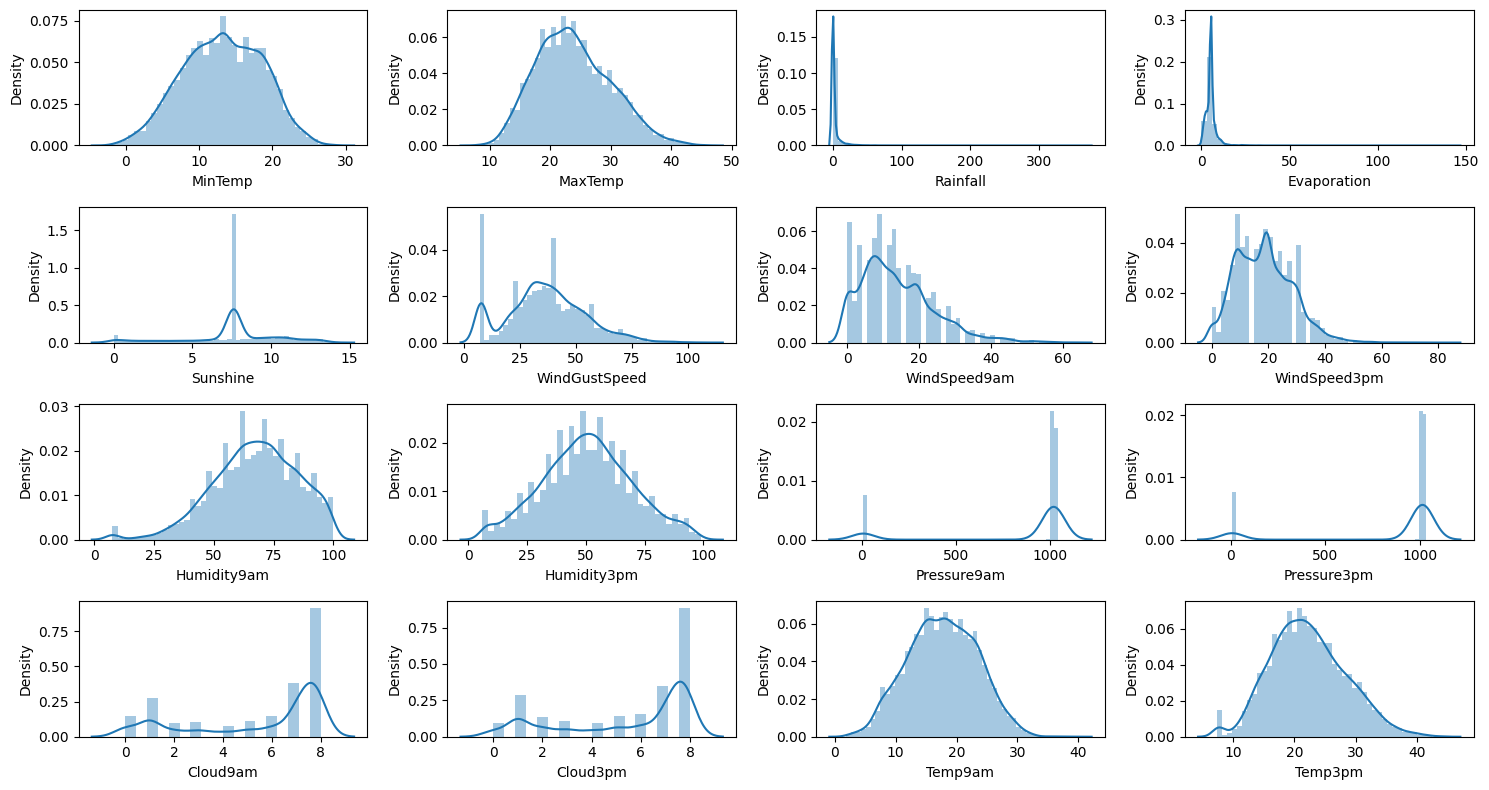

In [27]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(4,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


Let’s draw boxplots for the continuous variable to detect the outliers present in the data.



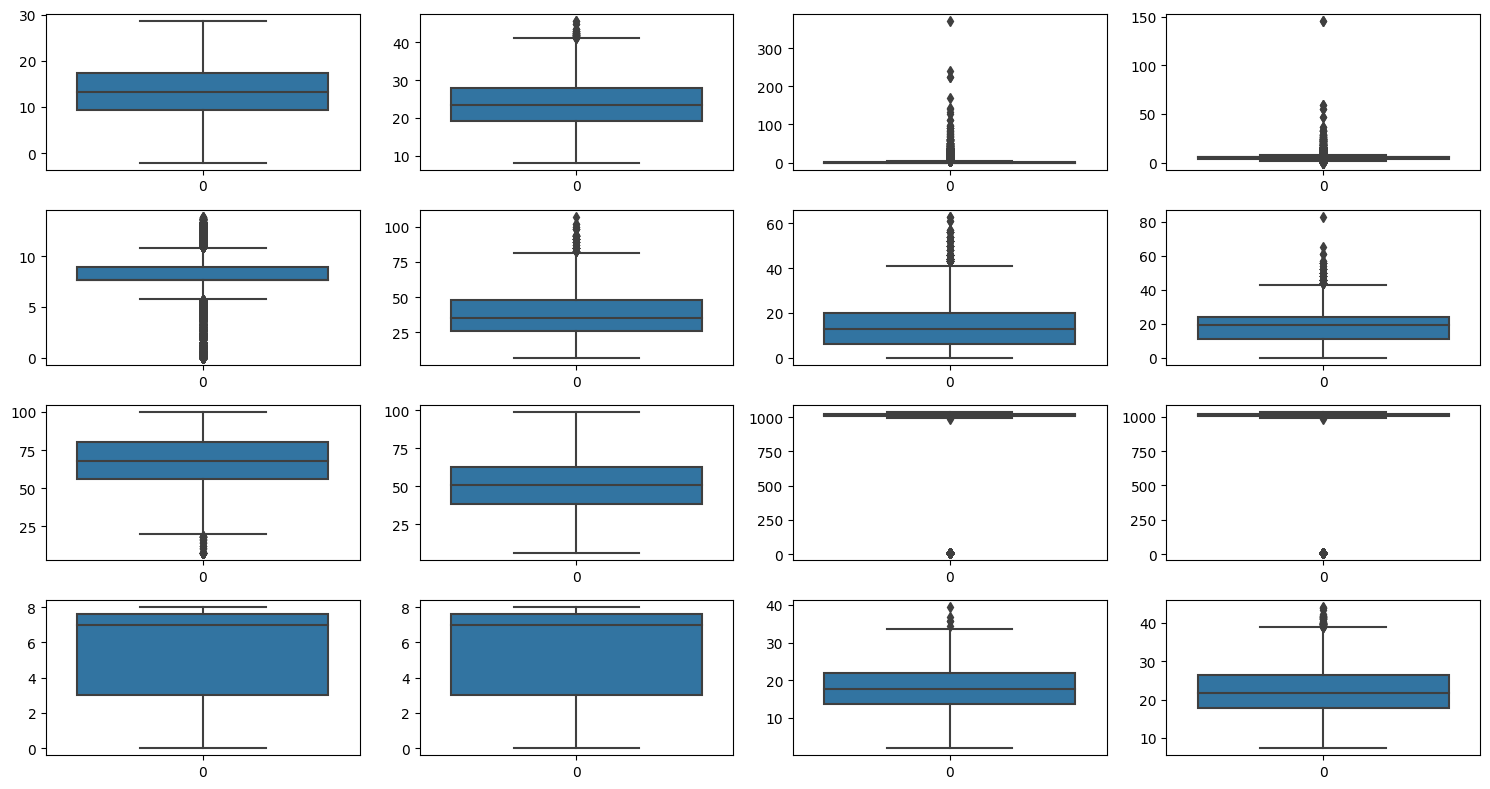

In [26]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(4,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


There are outliers in the data but sadly we do not have much data so, we cannot remove this.



In [28]:
df.replace({'yes':1, 'no':0}, inplace=True)


Sometimes there are highly correlated features that just increase the dimensionality of the feature space and do not good for the model’s performance. So we must check whether there are highly correlated features in this dataset or not.



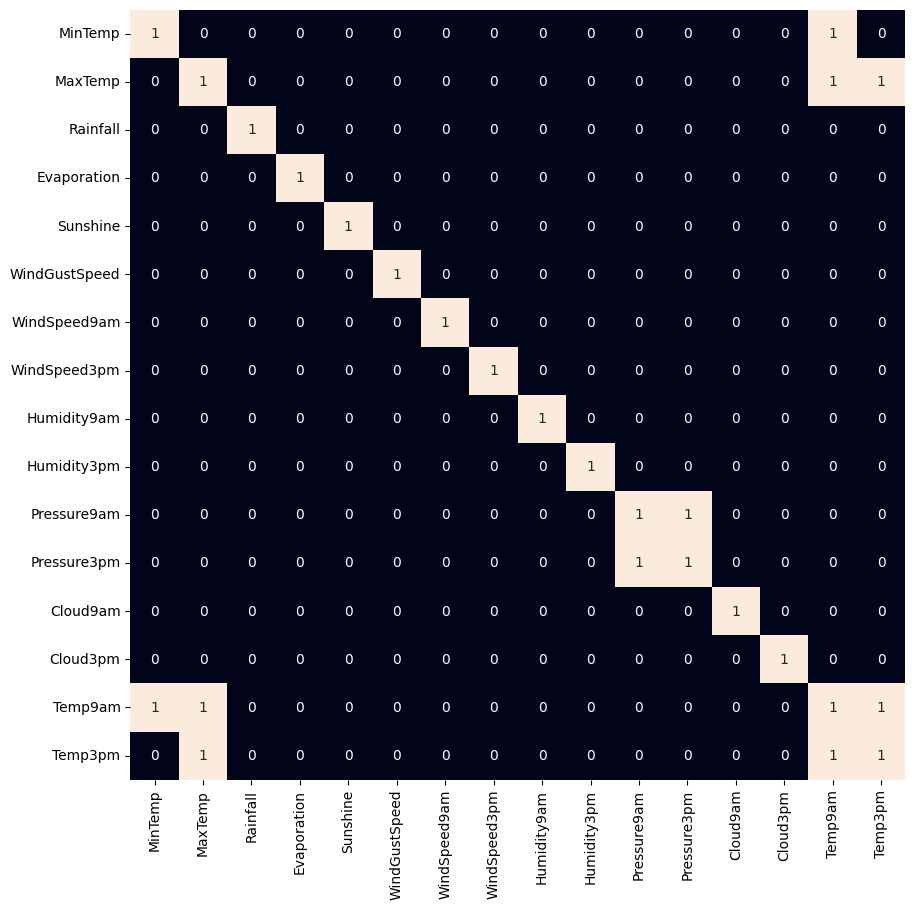

In [29]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()


Now we will remove the highly correlated features ‘maxtemp’ and ‘mintemp’. But why not temp or dewpoint? This is because temp and dewpoint provide distinct information regarding the weather and atmospheric conditions.



In [32]:
df.drop(['MaxTemp', 'MinTemp'], axis=1, inplace=True)


Model Training


Now we will separate the features and target variables and split them into training and testing data by using which we will select the model which is performing best on the validation data.



In [33]:
features = df.drop(['Date', 'RainTomorrow'], axis=1)
target = df.RainTomorrow


As we found earlier that the dataset we were using was imbalanced so, we will have to balance the training data before feeding it to the model.



In [ ]:
X_train, X_val, \
    Y_train, Y_val = train_test_split(features,
                                      target,
                                      test_size=0.2,
                                      stratify=target,
                                      random_state=2)

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)


The features of the dataset were at different scales so, normalizing it before training will help us to obtain optimum results faster along with stable training.



In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


Now let’s train some state-of-the-art models for classification and train them on our training data.

LogisticRegression
XGBClassifier
SVC


In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(3):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X)
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  val_preds = models[i].predict_proba(X_val)
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
  print()


Model Evaluation

From the above accuracies, we can say that Logistic Regression and support vector classifier are satisfactory as the gap between the training and the validation accuracy is low. Let’s plot the confusion matrix as well for the validation data using the SVC model.



In [ ]:
metrics.plot_confusion_matrix(models[2], X_val, Y_val)
plt.show()


In [ ]:
print(metrics.classification_report(Y_val,
                                    models[2].predict(X_val)))


              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74
